> __Purpose:__ This NB takes forever to run. The functionality of this ended up being to create and plot the results, and then I saved the results so that I could use them in a fresh new NB without all this code and crazy run times.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import pickle
import random
from kcs_ml_infr import *
from experiment_params import *
from fl_sim_client import *
from fl_sim_server import *

import seaborn as sns
from presentation_sns_config import *

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#import warnings
#warnings.filterwarnings("ignore")

random.seed(a=1)

In [3]:
final_update = 16

## Load Data

In [4]:
path = r'C:\Users\kdmen\Desktop\Research\Data'
cond0_filename = r'\cond0_dict_list.p'
all_decs_init_filename = r'\all_decs_init.p'
nofl_decs_filename = r'\nofl_decs.p'
id2color = {0:'lightcoral', 1:'maroon', 2:'chocolate', 3:'darkorange', 4:'gold', 5:'olive', 6:'olivedrab', 
            7:'lawngreen', 8:'aquamarine', 9:'deepskyblue', 10:'steelblue', 11:'violet', 12:'darkorchid', 13:'deeppink'}
implemented_client_training_methods = ['EtaGradStep', 'EtaScipyMinStep', 'FullScipyMinStep']
implement_these_methods_next = ['APFL', 'AFL', 'PersA_FL_MAML', 'PersA_FL_ME', 'PFA']
num_participants = 14

D_0 = np.random.rand(2,64)
D_0_7 = np.random.rand(2,7)
D_0_10 = np.random.rand(2,10)

In [5]:
with open(path + r'\continuous_full_data_block1.pickle', 'rb') as handle:
    #refs_block1, poss_block1, dec_vels_block1, int_vel_block1, emgs_block1, Ws_block1, Hs_block1, alphas_block1, pDs_block1, times_block1, conditions_block1 = pickle.load(handle)
    refs_block1, _, _, _, emgs_block1, Ws_block1, _, _, _, _, _ = pickle.load(handle)

cond1b1_dict_list = [0]*num_participants
cond2b1_dict_list = [0]*num_participants
cond3b1_dict_list = [0]*num_participants
cond4b1_dict_list = [0]*num_participants
cond5b1_dict_list = [0]*num_participants
cond6b1_dict_list = [0]*num_participants
cond7b1_dict_list = [0]*num_participants
cond8b1_dict_list = [0]*num_participants
for idx in range(num_participants):
    b1_emg = emgs_block1[keys[idx]]
    b1_ref = refs_block1[keys[idx]]
    cond1b1_dict_list[idx] = {'training':b1_emg[0,:,:], 'labels':b1_ref[0,:,:]}
    cond2b1_dict_list[idx] = {'training':b1_emg[1,:,:], 'labels':b1_ref[1,:,:]}
    cond3b1_dict_list[idx] = {'training':b1_emg[2,:,:], 'labels':b1_ref[2,:,:]}
    cond4b1_dict_list[idx] = {'training':b1_emg[3,:,:], 'labels':b1_ref[3,:,:]}
    cond5b1_dict_list[idx] = {'training':b1_emg[4,:,:], 'labels':b1_ref[4,:,:]}
    cond6b1_dict_list[idx] = {'training':b1_emg[5,:,:], 'labels':b1_ref[5,:,:]}
    cond7b1_dict_list[idx] = {'training':b1_emg[6,:,:], 'labels':b1_ref[6,:,:]}
    cond8b1_dict_list[idx] = {'training':b1_emg[7,:,:], 'labels':b1_ref[7,:,:]}
    
    cond1b1_AllInitDecs_list = [Ws_block1[keys[i]][0, 0, :, :] for i in range(num_participants)]
    cond2b1_AllInitDecs_list = [Ws_block1[keys[i]][1, 0, :, :] for i in range(num_participants)]
    cond3b1_AllInitDecs_list = [Ws_block1[keys[i]][2, 0, :, :] for i in range(num_participants)]
    cond4b1_AllInitDecs_list = [Ws_block1[keys[i]][3, 0, :, :] for i in range(num_participants)]
    cond5b1_AllInitDecs_list = [Ws_block1[keys[i]][4, 0, :, :] for i in range(num_participants)]
    cond6b1_AllInitDecs_list = [Ws_block1[keys[i]][5, 0, :, :] for i in range(num_participants)]
    cond7b1_AllInitDecs_list = [Ws_block1[keys[i]][6, 0, :, :] for i in range(num_participants)]
    cond8b1_AllInitDecs_list = [Ws_block1[keys[i]][7, 0, :, :] for i in range(num_participants)]


## No-FL Case

In [11]:
# CPHS MODELS
'''
users_c1 = [Client(i, cond1b1_AllInitDecs_list[i], 'FullScipyMinStep', cond1b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=False, PCA_comps=64, delay_scaling=0) for i in range(14)]
global_c1 = Server(-1, D_0, 'NoFL', users_c1, PCA_comps=64)

users_c2 = [Client(i, cond2b1_AllInitDecs_list[i], 'FullScipyMinStep', cond2b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=False, PCA_comps=64, condition_number=2, delay_scaling=0) for i in range(14)]
global_c2 = Server(-1, D_0, 'NoFL', users_c2, PCA_comps=64)

users_c3 = [Client(i, cond3b1_AllInitDecs_list[i], 'FullScipyMinStep', cond3b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=False, PCA_comps=64, condition_number=3, delay_scaling=0) for i in range(14)]
global_c3 = Server(-1, D_0, 'NoFL', users_c3, PCA_comps=64)

users_c4 = [Client(i, cond4b1_AllInitDecs_list[i], 'FullScipyMinStep', cond4b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=False, PCA_comps=64, condition_number=4, delay_scaling=0) for i in range(14)]
global_c4 = Server(-1, D_0, 'NoFL', users_c4, PCA_comps=64)

users_c5 = [Client(i, cond5b1_AllInitDecs_list[i], 'FullScipyMinStep', cond5b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=False, PCA_comps=64, condition_number=5, delay_scaling=0) for i in range(14)]
global_c5 = Server(-1, D_0, 'NoFL', users_c5, PCA_comps=64)

users_c6 = [Client(i, cond6b1_AllInitDecs_list[i], 'FullScipyMinStep', cond6b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=False, PCA_comps=64, condition_number=6, delay_scaling=0) for i in range(14)]
global_c6 = Server(-1, D_0, 'NoFL', users_c6, PCA_comps=64)

users_c7 = [Client(i, cond7b1_AllInitDecs_list[i], 'FullScipyMinStep', cond7b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=False, PCA_comps=64, condition_number=7, delay_scaling=0) for i in range(14)]
global_c7 = Server(-1, D_0, 'NoFL', users_c7, PCA_comps=64)

users_c8 = [Client(i, cond8b1_AllInitDecs_list[i], 'FullScipyMinStep', cond8b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=False, PCA_comps=64, condition_number=8, delay_scaling=0) for i in range(14)]
global_c8 = Server(-1, D_0, 'NoFL', users_c8, PCA_comps=64)

num_updates_left = 19
for i in range(num_updates_left):
    global_c1.execute_FL_loop()
    global_c2.execute_FL_loop()
    global_c3.execute_FL_loop()
    global_c4.execute_FL_loop()
    global_c5.execute_FL_loop()
    global_c6.execute_FL_loop()
    global_c7.execute_FL_loop()
    global_c8.execute_FL_loop()
'''
0

0

In [12]:
users_c1 = [Client(i, cond1b1_AllInitDecs_list[i], 'FullScipyMinStep', cond1b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=True, PCA_comps=10, condition_number=1, delay_scaling=0, set_alphaF_zero=True) for i in range(14)]
global_c1 = Server(-1, D_0_10, 'NoFL', users_c1, PCA_comps=64)

users_c2 = [Client(i, cond2b1_AllInitDecs_list[i], 'FullScipyMinStep', cond2b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=True, PCA_comps=10, condition_number=2, delay_scaling=0, set_alphaF_zero=True) for i in range(14)]
global_c2 = Server(-1, D_0_10, 'NoFL', users_c2, PCA_comps=64)

users_c3 = [Client(i, cond3b1_AllInitDecs_list[i], 'FullScipyMinStep', cond3b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=True, PCA_comps=10, condition_number=3, delay_scaling=0, set_alphaF_zero=True) for i in range(14)]
global_c3 = Server(-1, D_0_10, 'NoFL', users_c3, PCA_comps=64)

users_c4 = [Client(i, cond4b1_AllInitDecs_list[i], 'FullScipyMinStep', cond4b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=True, PCA_comps=10, condition_number=4, delay_scaling=0, set_alphaF_zero=True) for i in range(14)]
global_c4 = Server(-1, D_0_10, 'NoFL', users_c4, PCA_comps=64)

users_c5 = [Client(i, cond5b1_AllInitDecs_list[i], 'FullScipyMinStep', cond5b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=True, PCA_comps=10, condition_number=5, delay_scaling=0, set_alphaF_zero=True) for i in range(14)]
global_c5 = Server(-1, D_0_10, 'NoFL', users_c5, PCA_comps=64)

users_c6 = [Client(i, cond6b1_AllInitDecs_list[i], 'FullScipyMinStep', cond6b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=True, PCA_comps=10, condition_number=6, delay_scaling=0, set_alphaF_zero=True) for i in range(14)]
global_c6 = Server(-1, D_0_10, 'NoFL', users_c6, PCA_comps=64)

users_c7 = [Client(i, cond7b1_AllInitDecs_list[i], 'FullScipyMinStep', cond7b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=True, PCA_comps=10, condition_number=7, delay_scaling=0, set_alphaF_zero=True) for i in range(14)]
global_c7 = Server(-1, D_0_10, 'NoFL', users_c7, PCA_comps=64)

users_c8 = [Client(i, cond8b1_AllInitDecs_list[i], 'FullScipyMinStep', cond8b1_dict_list[i], 'advance_each_iter', global_method='NoFL', track_cost_components=True, normalize_EMG=True, PCA_comps=10, condition_number=8, delay_scaling=0, set_alphaF_zero=True) for i in range(14)]
global_c8 = Server(-1, D_0_10, 'NoFL', users_c8, PCA_comps=64)

num_updates_left = 19
for i in range(num_updates_left):
    global_c1.execute_FL_loop()
    global_c2.execute_FL_loop()
    global_c3.execute_FL_loop()
    global_c4.execute_FL_loop()
    global_c5.execute_FL_loop()
    global_c6.execute_FL_loop()
    global_c7.execute_FL_loop()
    global_c8.execute_FL_loop()

Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provided init decoder: (2, 64) --> (2, 10)
Class BaseModel: Overwrote the provide

In [13]:
t0 = time.time()

dec_flattened1 = pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec'])
dec_flattened2 = pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec'])
dec_flattened3 = pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec'])
dec_flattened4 = pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec'])
dec_flattened5 = pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec'])
dec_flattened6 = pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec'])
dec_flattened7 = pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec'])
dec_flattened8 = pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec'])
for key_idx, key in enumerate(keys):
    for update_number, update_idx in enumerate(update_ix):
        dec_flattened1.loc[len(dec_flattened1)] = [key, update_number, np.ravel(users_c1[key_idx].dec_log[update_number])]
        dec_flattened2.loc[len(dec_flattened2)] = [key, update_number, np.ravel(users_c2[key_idx].dec_log[update_number])]
        dec_flattened3.loc[len(dec_flattened3)] = [key, update_number, np.ravel(users_c3[key_idx].dec_log[update_number])]
        dec_flattened4.loc[len(dec_flattened4)] = [key, update_number, np.ravel(users_c4[key_idx].dec_log[update_number])]
        dec_flattened5.loc[len(dec_flattened5)] = [key, update_number, np.ravel(users_c5[key_idx].dec_log[update_number])]
        dec_flattened6.loc[len(dec_flattened6)] = [key, update_number, np.ravel(users_c6[key_idx].dec_log[update_number])]
        dec_flattened7.loc[len(dec_flattened7)] = [key, update_number, np.ravel(users_c7[key_idx].dec_log[update_number])]
        dec_flattened8.loc[len(dec_flattened8)] = [key, update_number, np.ravel(users_c8[key_idx].dec_log[update_number])]        
        
t1 = time.time()
total = t1-t0  
print(total)

2.7498340606689453


In [14]:
# Concat all the dfs into a single training input dataframe
dec_flattened = pd.concat([dec_flattened1, dec_flattened2, dec_flattened3, dec_flattened4, dec_flattened5, dec_flattened6, dec_flattened7, dec_flattened8], ignore_index=True, axis=0)

# Make each ele its own cell
expanded_dec_df = dec_flattened.join(dec_flattened['Flattened Dec'].apply(pd.Series)).drop('Flattened Dec', axis=1)
print(expanded_dec_df.shape)
expanded_dec_df.head()

(2128, 22)


,Subject,Update Number,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,METACPHS_S106,0,0.639987,0.236536,0.462156,0.407306,0.356103,0.505954,0.210762,0.998780,...,0.202091,0.386350,0.587395,0.084271,0.006387,0.301949,0.299735,0.345505,0.670115,0.740436
1,METACPHS_S106,1,0.472067,0.176033,0.343986,0.305711,0.267225,0.380247,0.157903,0.749560,...,0.156149,0.286398,0.440692,0.062595,0.004379,0.226351,0.224943,0.259217,0.502651,0.555357
2,METACPHS_S106,2,0.351996,0.141117,0.256792,0.229592,0.200252,0.285051,0.118290,0.563150,...,0.114560,0.212665,0.329932,0.047093,0.003577,0.170113,0.168928,0.193926,0.376781,0.416778
3,METACPHS_S106,3,0.276189,0.104250,0.195049,0.173619,0.150486,0.214513,0.089565,0.422551,...,0.086501,0.158662,0.247116,0.034514,0.002635,0.127064,0.126977,0.145388,0.282264,0.312780
4,METACPHS_S106,4,0.210017,0.079847,0.147020,0.131504,0.112804,0.160353,0.067443,0.316666,...,0.068562,0.118071,0.184944,0.025186,0.002057,0.095051,0.095226,0.109009,0.211679,0.234578


In [15]:
assert(np.sum(expanded_dec_df.isnull().values)==0)

# Adversarial Modeling

In [13]:
#my_models = [LogisticRegression(), KNeighborsClassifier(), GradientBoostingClassifier()]
my_models = [LogisticRegression(), KNeighborsClassifier(), LinearSVC(), SGDClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier()]

In [17]:
def make_all_update_models(flattened_input_df, n_start_stop=(0, 18), num_kfolds=5, stratification=False, my_metrics_columns=['Algorithm', 'One Off Acc', 'CV Acc', 'K Folds'], my_models_list=[LogisticRegression(), KNeighborsClassifier(), GaussianNB(), LinearSVC(), SGDClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier()], make_df=True, full_test_df=pd.DataFrame()):

    if make_df:
        full_test_df = pd.DataFrame(columns=my_metrics_columns)

    if n_start_stop[1]>=17:
        n_stop=16
    else:
        n_stop = n_start_stop[1]
    for i in range(n_start_stop[0], n_stop+1):
        print(f"Round i={i} of stop={n_start_stop[1]}")
        ith_df, ith_test_df = nth_decoder_model(flattened_input_df, i, my_models_list, stratification=stratification, cv=num_kfolds, test=True)

        full_test_df = pd.concat((full_test_df, ith_test_df))

    full_test_df.drop('K Folds', axis=1, inplace=True)
    full_test_df.drop('One Off Acc', axis=1, inplace=True)
    full_test_df.drop('CV Acc', axis=1, inplace=True)

    return full_test_df

In [18]:
full_test_df = make_all_update_models(expanded_dec_df, stratification=True)
print(full_test_df.shape)
full_test_df.head(8)

(119, 3)


,Algorithm,Test Acc,N
0,LogisticRegression(),11.765,0
0,KNeighborsClassifier(),5.882,0
0,GaussianNB(),8.824,0
0,LinearSVC(),11.765,0
0,SGDClassifier(),11.765,0
0,DecisionTreeClassifier(),11.765,0
0,GradientBoostingClassifier(),5.882,0
0,LogisticRegression(),11.765,1


## Plot Accuracy As a Func of N

In [19]:
lr_df = full_test_df[full_test_df['Algorithm']=='LogisticRegression()']
knn_df = full_test_df[full_test_df['Algorithm']=='KNeighborsClassifier()']
svc_df = full_test_df[full_test_df['Algorithm']=='LinearSVC()']
sgd_df = full_test_df[full_test_df['Algorithm']=='SGDClassifier()']
dt_df = full_test_df[full_test_df['Algorithm']=='DecisionTreeClassifier()']
gbt_df = full_test_df[full_test_df['Algorithm']=='GradientBoostingClassifier()']

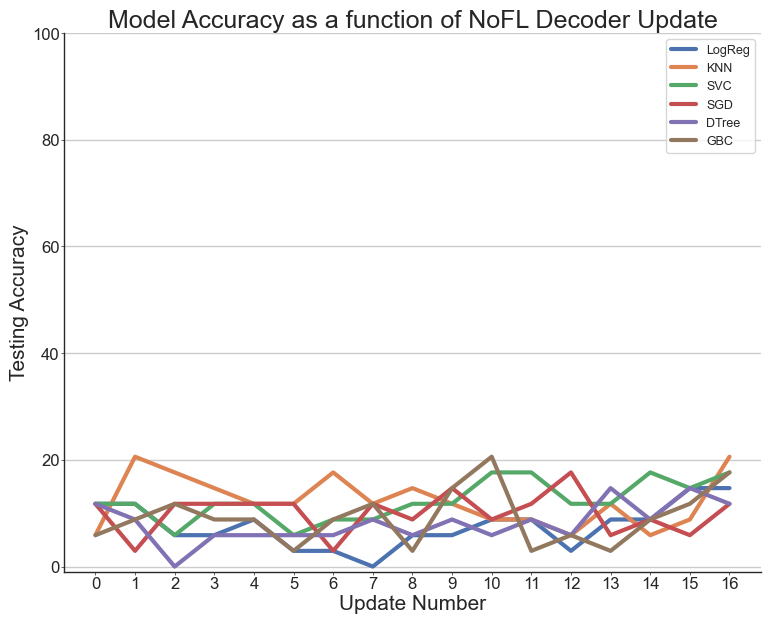

In [20]:
col_num = 1
my_x_updates = list(range(17))

plt.figure(figsize=(9,7))
plt.plot(my_x_updates, lr_df.iloc[:, col_num], label='LogReg')
plt.plot(my_x_updates, knn_df.iloc[:, col_num], label='KNN')
plt.plot(my_x_updates, svc_df.iloc[:, col_num], label='SVC')
plt.plot(my_x_updates, sgd_df.iloc[:, col_num], label='SGD')
plt.plot(my_x_updates, dt_df.iloc[:, col_num], label='DTree')
plt.plot(my_x_updates, gbt_df.iloc[:, col_num], label='GBC')
plt.xticks(np.arange(0, final_update+1, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Model Accuracy as a function of NoFL Decoder Update')
plt.legend(loc='best')
plt.show()

In [21]:
nofl_mean_df = pd.DataFrame()
nofl_mean_df = pd.concat([nofl_mean_df, lr_df['Test Acc']], axis=1)
nofl_mean_df = pd.concat([nofl_mean_df, knn_df['Test Acc']], axis=1)
nofl_mean_df = pd.concat([nofl_mean_df, svc_df['Test Acc']], axis=1)
nofl_mean_df = pd.concat([nofl_mean_df, sgd_df['Test Acc']], axis=1)
nofl_mean_df = pd.concat([nofl_mean_df, gbt_df['Test Acc']], axis=1)
nofl_mean_series_no_dt = nofl_mean_df.mean(axis=1)
print(nofl_mean_series_no_dt.shape)
print(nofl_mean_series_no_dt)
print()

# Drop DT?
nofl_mean_df = pd.concat([nofl_mean_df, dt_df['Test Acc']], axis=1)

nofl_mean_series = nofl_mean_df.mean(axis=1)
print(nofl_mean_series.shape)
print(nofl_mean_series)

(17,)
0     9.4118
0    11.1766
0    10.5882
0    10.5884
0    10.5886
0     7.0588
0     8.2354
0     8.8238
0     8.8236
0    11.7648
0    12.9414
0    10.0002
0     8.8234
0     8.2354
0    10.0002
0    11.1766
0    16.4706
dtype: object

(17,)
0        9.804
0      10.7845
0       8.8235
0        9.804
0     9.804167
0     6.862667
0     7.843167
0     8.823833
0     8.333333
0    11.274667
0    11.764833
0     9.804167
0     8.333167
0     9.313833
0     9.804167
0    11.764833
0    15.686333
dtype: object


This one probably didn't do well since it has so little data to train on.  Each participant literally has like 6 examples total.

## 1 Scipy Step (FL)

(Current Local Round, Current Local Update)
(352, 16)
(353, 16)
(363, 16)
(398, 16)
(335, 16)
(365, 16)
(365, 16)
(366, 16)
(337, 16)
(348, 16)
(347, 16)
(361, 16)
(374, 16)
(336, 16)


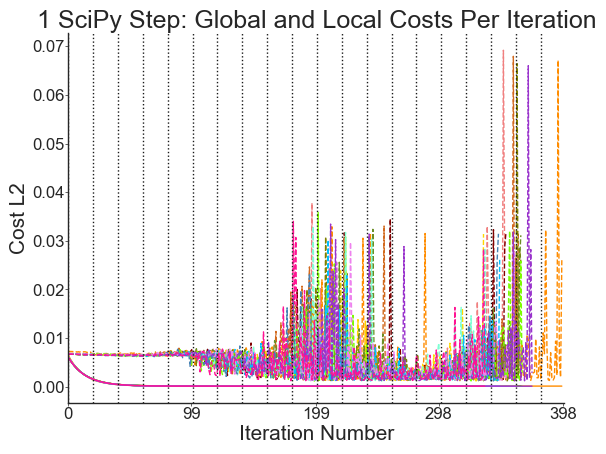

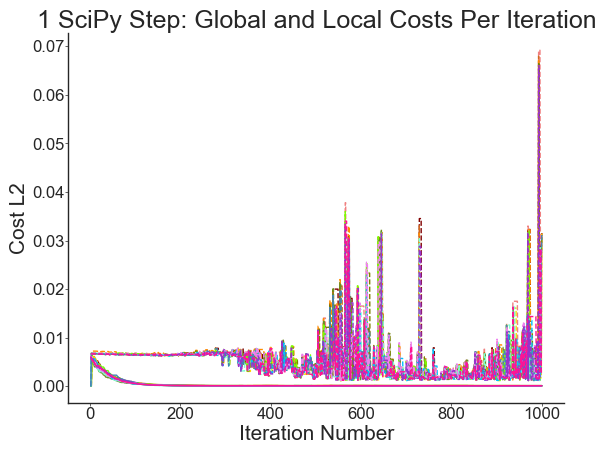

In [6]:
users_c1_1ss = [Client(i, D_0_10, 'EtaScipyMinStep', cond1b1_dict_list[i], 'streaming', local_round_threshold=20, starting_update=0, delay_scaling=0, set_alphaF_zero=True) for i in range(14)]
global_c1_1ss = Server(1, D_0_10, 'FedAvg', users_c1_1ss)

big_loop_iters = 1000
for i in range(big_loop_iters):
    global_c1_1ss.execute_FL_loop()
    
print("(Current Local Round, Current Local Update)")
for my_client in global_c1_1ss.all_clients:
    print((my_client.current_round, my_client.current_update))
    
condensed_external_plotting(users_c1_1ss, 'local', custom_title='1 SciPy Step: Global and Local Costs Per Iteration')
condensed_external_plotting(global_c1_1ss, 'global', show_update_change=False, custom_title='1 SciPy Step: Global and Local Costs Per Iteration')
#condensed_external_plotting(users_c1_1ss, 'local', dim_reduc_factor=1, plot_gradient=True, local_error=False, global_error=False, custom_title='DRF=1[Off]: GRADIENT')

In [7]:
random.seed(a=27)
#cond2b1_AllInitDecs_list[i]
# Replaced the above since then init dec is 2x64 when all should be 2x7

# BY DEFAULT: local_round_threshold=50
#user_c0_1ScipyStep = [Client(i, D_0_10, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', starting_update=0, set_alphaF_zero=True, delay_scaling=0, verbose=True) for i in range(14)]
users_c2_1ss = [Client(i, D_0_10, 'EtaScipyMinStep', cond2b1_dict_list[i], 'streaming', condition_number=2, delay_scaling=0, local_round_threshold=20, starting_update=0, set_alphaF_zero=True) for i in range(14)]
global_c2_1ss = Server(-1, D_0_10, 'FedAvg', users_c2_1ss)

users_c3_1ss = [Client(i, D_0_10, 'EtaScipyMinStep', cond2b1_dict_list[i], 'streaming', condition_number=3, delay_scaling=0, local_round_threshold=20, starting_update=0, set_alphaF_zero=True) for i in range(14)]
global_c3_1ss = Server(-1, D_0_10, 'FedAvg', users_c3_1ss)

users_c4_1ss = [Client(i, D_0_10, 'FullScipyMinStep', cond4b1_dict_list[i], 'streaming', condition_number=4, delay_scaling=0, local_round_threshold=20, starting_update=0, set_alphaF_zero=True) for i in range(14)]
global_c4_1ss = Server(-1, D_0_10, 'FedAvg', users_c4_1ss)

users_c5_1ss = [Client(i, D_0_10, 'FullScipyMinStep', cond5b1_dict_list[i], 'streaming', condition_number=5, delay_scaling=0, local_round_threshold=20, starting_update=0, set_alphaF_zero=True) for i in range(14)]
global_c5_1ss = Server(-1, D_0_10, 'FedAvg', users_c5_1ss)

users_c6_1ss = [Client(i, D_0_10, 'FullScipyMinStep', cond6b1_dict_list[i], 'streaming', condition_number=6, delay_scaling=0, local_round_threshold=20, starting_update=0, set_alphaF_zero=True) for i in range(14)]
global_c6_1ss = Server(-1, D_0_10, 'FedAvg', users_c6_1ss)

users_c7_1ss = [Client(i, D_0_10, 'FullScipyMinStep', cond7b1_dict_list[i], 'streaming', condition_number=7, delay_scaling=0, local_round_threshold=20, starting_update=0, set_alphaF_zero=True) for i in range(14)]
global_c7_1ss = Server(-1, D_0_10, 'FedAvg', users_c7_1ss)

users_c8_1ss = [Client(i, D_0_10, 'FullScipyMinStep', cond8b1_dict_list[i], 'streaming', condition_number=8, delay_scaling=0, local_round_threshold=20, starting_update=0, set_alphaF_zero=True) for i in range(14)]
global_c8_1ss = Server(-1, D_0_10, 'FedAvg', users_c8_1ss)

for i in range(big_loop_iters):
    global_c2_1ss.execute_FL_loop()
    global_c3_1ss.execute_FL_loop()
    global_c4_1ss.execute_FL_loop()
    global_c5_1ss.execute_FL_loop()
    global_c6_1ss.execute_FL_loop()
    global_c7_1ss.execute_FL_loop()
    global_c8_1ss.execute_FL_loop()

In [8]:
t0 = time.time()

users_lst = [users_c1_1ss, users_c2_1ss, users_c3_1ss, users_c4_1ss, users_c5_1ss, users_c6_1ss, users_c7_1ss, users_c8_1ss]
cond_dfs = [pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec']) for _ in range(8)]
global_cond_dfs = [pd.DataFrame(columns=['Subject', 'Update Number', 'Flattened Dec']) for _ in range(8)]

last_update = 16
for key_idx, key in enumerate(keys):
    print(key)
    #df1.loc[len(dec_flattened1)] = [key, update_number, np.ravel(users_c1_1ss[key_idx].dec_log[update_number])]
    for cond_number in range(8):
        print(cond_number)
        update_number = 0 #10
        for current_iter in range(len(users_lst[cond_number][key_idx].dec_log)):
            if update_number==last_update:
                # Skip the last update
                # We shouldn't reach this with just 500 iters
                #print("LAST UPDATE")
                continue
            elif current_iter!=0 and current_iter%users_lst[cond_number][key_idx].local_round_threshold==0:
                update_number+=1
                if update_number==last_update:
                    continue

            # Local decoder
            cond_dfs[cond_number].loc[cond_dfs[cond_number].shape[0]] = [key, update_number, np.ravel(users_lst[cond_number][key_idx].dec_log[current_iter])]
            # Global decoder
            global_cond_dfs[cond_number].loc[global_cond_dfs[cond_number].shape[0]] = [key, update_number, np.ravel(users_lst[cond_number][key_idx].global_dec_log[current_iter])]


t1 = time.time()
total = t1-t0  
print(total)

METACPHS_S106
0
1
2
3
4
5
6
7
METACPHS_S107
0
1
2
3
4
5
6
7
METACPHS_S108
0
1
2
3
4
5
6
7
METACPHS_S109
0
1
2
3
4
5
6
7
METACPHS_S110
0
1
2
3
4
5
6
7
METACPHS_S111
0
1
2
3
4
5
6
7
METACPHS_S112
0
1
2
3
4
5
6
7
METACPHS_S113
0
1
2
3
4
5
6
7
METACPHS_S114
0
1
2
3
4
5
6
7
METACPHS_S115
0
1
2
3
4
5
6
7
METACPHS_S116
0
1
2
3
4
5
6
7
METACPHS_S117
0
1
2
3
4
5
6
7
METACPHS_S118
0
1
2
3
4
5
6
7
METACPHS_S119
0
1
2
3
4
5
6
7
369.6627938747406


In [9]:
# Concat all the dfs into a single training input dataframe
dec_flattened_1ss = pd.concat([cond_dfs[0], cond_dfs[1], cond_dfs[2], cond_dfs[3], cond_dfs[4], cond_dfs[5], cond_dfs[6], cond_dfs[7]], ignore_index=True, axis=0)

# Make each ele its own cell
expanded_dec_df_1ss = dec_flattened_1ss.join(dec_flattened_1ss['Flattened Dec'].apply(pd.Series)).drop('Flattened Dec', axis=1)
print(expanded_dec_df_1ss.shape)
expanded_dec_df_1ss.head()

(35830, 22)


,Subject,Update Number,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,METACPHS_S106,0,0.462176,0.561366,0.461997,0.859297,0.187472,0.770148,0.102243,0.315511,...,0.920750,0.375868,0.108125,0.729381,0.456887,0.025575,0.987755,0.386792,0.561930,0.249009
1,METACPHS_S106,0,0.438273,0.536855,0.441695,0.822461,0.179513,0.737496,0.097862,0.302164,...,0.877084,0.359041,0.103529,0.697961,0.437365,0.024466,0.945765,0.370356,0.538041,0.238418
2,METACPHS_S106,0,0.420346,0.518472,0.426467,0.794834,0.173544,0.713008,0.094577,0.292153,...,0.844334,0.346422,0.100082,0.674396,0.422724,0.023634,0.914271,0.358028,0.520123,0.230474
3,METACPHS_S106,0,0.402082,0.499618,0.410844,0.766486,0.167417,0.687868,0.091204,0.281876,...,0.810968,0.333478,0.096545,0.650217,0.407694,0.022780,0.881940,0.345373,0.501728,0.222319
4,METACPHS_S106,0,0.384769,0.481677,0.395975,0.739504,0.161583,0.663934,0.087993,0.272091,...,0.779341,0.321162,0.093179,0.627203,0.393385,0.021968,0.851157,0.333323,0.484215,0.214554


In [10]:
expanded_dec_df_1ss.tail()

,Subject,Update Number,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
35825,METACPHS_S119,15,0.092597,0.160927,-0.028533,-0.063095,-0.001166,-0.030455,0.005291,-0.011784,...,0.126148,-0.134660,-0.049312,0.018172,0.010860,0.003219,0.016278,0.004364,-0.001468,-0.001449
35826,METACPHS_S119,15,0.092562,0.160696,-0.028522,-0.063014,-0.001124,-0.030381,0.005264,-0.011821,...,0.125895,-0.134254,-0.049304,0.018181,0.010848,0.003217,0.016281,0.004355,-0.001474,-0.001442
35827,METACPHS_S119,15,0.092588,0.160869,-0.028530,-0.063075,-0.001155,-0.030436,0.005284,-0.011793,...,0.126085,-0.134559,-0.049310,0.018175,0.010857,0.003218,0.016279,0.004362,-0.001469,-0.001447
35828,METACPHS_S119,15,0.092569,0.160739,-0.028524,-0.063029,-0.001132,-0.030395,0.005269,-0.011814,...,0.125943,-0.134330,-0.049306,0.018179,0.010850,0.003218,0.016281,0.004357,-0.001473,-0.001444
35829,METACPHS_S119,15,0.092583,0.160837,-0.028529,-0.063063,-0.001149,-0.030426,0.005280,-0.011798,...,0.126049,-0.134502,-0.049309,0.018176,0.010856,0.003218,0.016279,0.004360,-0.001470,-0.001446


In [11]:
print(f"Number of NANs in DF: {set(expanded_dec_df_1ss.isnull().sum(axis=1))}")
present_updates = expanded_dec_df_1ss['Update Number'].unique()
print(f"Update Numbers Present in DF: {present_updates}")

Number of NANs in DF: {0}
Update Numbers Present in DF: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [18]:
full_test_df_1ss = make_all_update_models(expanded_dec_df_1ss, n_start_stop=(present_updates[0], present_updates[-1]), stratification=True)
full_test_df_1ss.head()

Round i=0 of stop=15
Round i=1 of stop=15
Round i=2 of stop=15
Round i=3 of stop=15
Round i=4 of stop=15
Round i=5 of stop=15
Round i=6 of stop=15
Round i=7 of stop=15
Round i=8 of stop=15
Round i=9 of stop=15
Round i=10 of stop=15
Round i=11 of stop=15
Round i=12 of stop=15
Round i=13 of stop=15
Round i=14 of stop=15
Round i=15 of stop=15


,Algorithm,Test Acc,N
0,LogisticRegression(),20.238,0
0,KNeighborsClassifier(),53.72,0
0,GaussianNB(),19.048,0
0,LinearSVC(),28.423,0
0,SGDClassifier(),19.048,0


In [19]:
lr_df_1ss = full_test_df_1ss[full_test_df_1ss['Algorithm']=='LogisticRegression()']
knn_df_1ss = full_test_df_1ss[full_test_df_1ss['Algorithm']=='KNeighborsClassifier()']
svc_df_1ss = full_test_df_1ss[full_test_df_1ss['Algorithm']=='LinearSVC()']
sgd_df_1ss = full_test_df_1ss[full_test_df_1ss['Algorithm']=='SGDClassifier()']
dt_df_1ss = full_test_df_1ss[full_test_df_1ss['Algorithm']=='DecisionTreeClassifier()']
gbt_df_1ss = full_test_df_1ss[full_test_df_1ss['Algorithm']=='GradientBoostingClassifier()']

In [20]:
lr_df_1ss.head()

,Algorithm,Test Acc,N
0,LogisticRegression(),20.238,0
0,LogisticRegression(),28.869,1
0,LogisticRegression(),20.089,2
0,LogisticRegression(),20.238,3
0,LogisticRegression(),26.488,4


In [21]:
col_num = 1  # Test Acc column
my_x_updates = list(range(present_updates[0], present_updates[-1]+1))

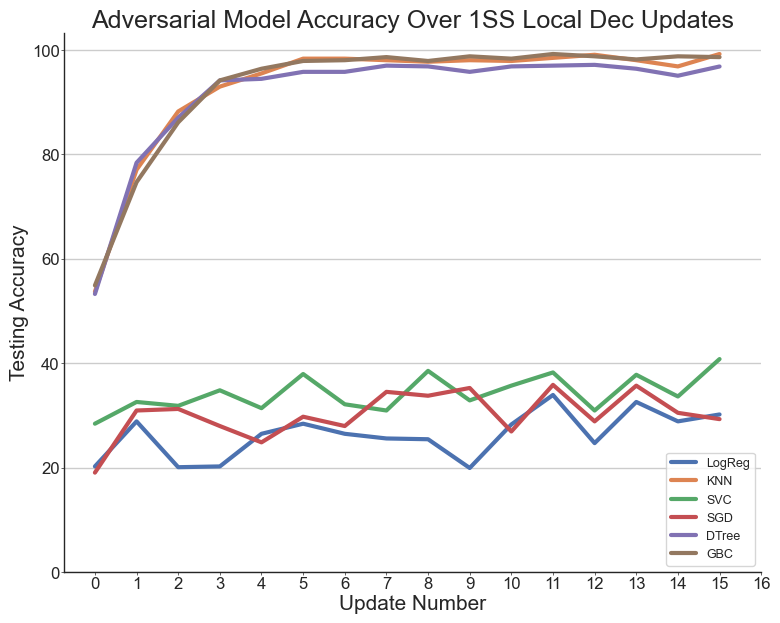

In [22]:
plt.figure(figsize=(9,7))
plt.plot(my_x_updates, lr_df_1ss.iloc[:, col_num], label='LogReg')
plt.plot(my_x_updates, knn_df_1ss.iloc[:, col_num], label='KNN')
plt.plot(my_x_updates, svc_df_1ss.iloc[:, col_num], label='SVC')
plt.plot(my_x_updates, sgd_df_1ss.iloc[:, col_num], label='SGD')
plt.plot(my_x_updates, dt_df_1ss.iloc[:, col_num], label='DTree')
plt.plot(my_x_updates, gbt_df_1ss.iloc[:, col_num], label='GBC')
plt.xticks(np.arange(0, final_update+1, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Adversarial Model Accuracy Over 1SS Local Dec Updates')
plt.legend(loc='best')
plt.show()

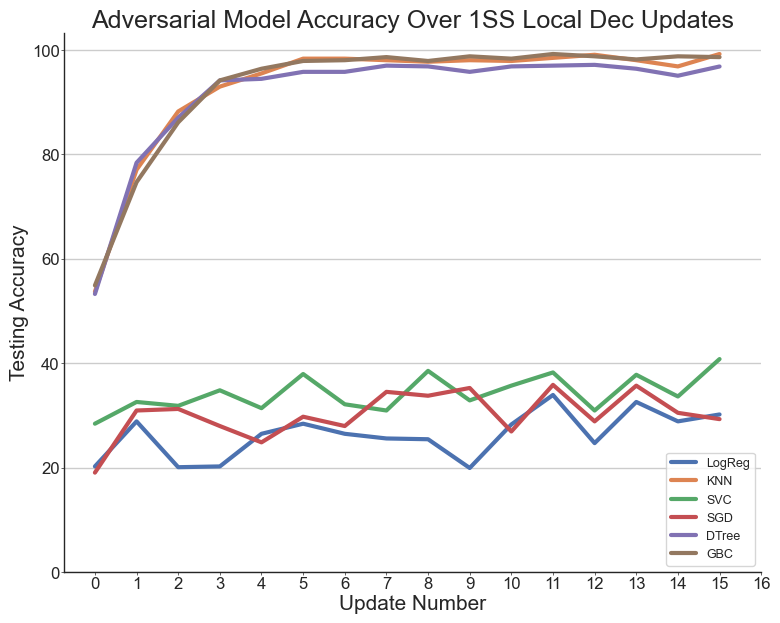

In [23]:
col_num = 1  # Test Acc column
my_x_updates = list(range(present_updates[0], present_updates[-1]+1))

plt.figure(figsize=(9,7))
plt.plot(my_x_updates, lr_df_1ss.iloc[:, col_num], label='LogReg')
plt.plot(my_x_updates, knn_df_1ss.iloc[:, col_num], label='KNN')
plt.plot(my_x_updates, svc_df_1ss.iloc[:, col_num], label='SVC')
plt.plot(my_x_updates, sgd_df_1ss.iloc[:, col_num], label='SGD')
plt.plot(my_x_updates, dt_df_1ss.iloc[:, col_num], label='DTree')
plt.plot(my_x_updates, gbt_df_1ss.iloc[:, col_num], label='GBC')
plt.xticks(np.arange(present_updates[0], final_update+1, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Adversarial Model Accuracy Over 1SS Local Dec Updates')
plt.legend(loc='best')
plt.show()

In [ ]:
assert(1==0)

In [33]:
lr_df_1ss.to_pickle(r"Saved_Metrics\300P_bad_lr_df.pkl")
knn_df_1ss.to_pickle(r"Saved_Metrics\3004P_good_knn_df.pkl")
svc_df_1ss.to_pickle(r"Saved_Metrics\300P_bad_svc_df.pkl")
dt_df_1ss.to_pickle(r"Saved_Metrics\300P_good_dt_df.pkl")
gbt_df_1ss.to_pickle(r"Saved_Metrics\3004P_good_gbt_df.pkl")

In [24]:
fl1ss_mean_df = pd.DataFrame()
fl1ss_mean_df = pd.concat([fl1ss_mean_df, knn_df_1ss['Test Acc']], axis=1)
fl1ss_mean_df = pd.concat([fl1ss_mean_df, dt_df_1ss['Test Acc']], axis=1)
fl1ss_mean_df = pd.concat([fl1ss_mean_df, gbt_df_1ss['Test Acc']], axis=1)
fl1ss_good_mean_series = fl1ss_mean_df.mean(axis=1)
print(fl1ss_good_mean_series.shape)
print(fl1ss_good_mean_series)
print()

fl1ss_mean_df = pd.concat([fl1ss_mean_df, lr_df_1ss['Test Acc']], axis=1)
fl1ss_mean_df = pd.concat([fl1ss_mean_df, sgd_df_1ss['Test Acc']], axis=1)
fl1ss_mean_df = pd.concat([fl1ss_mean_df, svc_df_1ss['Test Acc']], axis=1)
fl1ss_all_mean_series = fl1ss_mean_df.mean(axis=1)
print(fl1ss_all_mean_series.shape)
print(fl1ss_all_mean_series)

(16,)
0    53.968333
0       76.736
0       87.153
0    93.799333
0    95.486333
0       97.371
0    97.420333
0    97.916667
0        97.52
0    97.569333
0    97.718333
0       98.264
0    98.363333
0    97.569333
0    96.924667
0    98.256333
dtype: object

(16,)
0       38.269
0    53.769667
0      57.4405
0    60.738833
0    61.532833
0    64.707333
0    63.144667
0    64.136833
0    65.054667
0    63.467167
0       64.013
0       67.138
0    63.268833
0    66.468167
0    63.963333
0      65.8445
dtype: object


# Global Model Privacy Analysis

In [25]:
# Concat all the dfs into a single training input dataframe
global_dec_flattened_1ss = pd.concat([global_cond_dfs[0], global_cond_dfs[1], global_cond_dfs[2], global_cond_dfs[3], global_cond_dfs[4], global_cond_dfs[5], global_cond_dfs[6], global_cond_dfs[7]], ignore_index=True, axis=0)

# Make each ele its own cell
global_expanded_dec_df_1ss = global_dec_flattened_1ss.join(global_dec_flattened_1ss['Flattened Dec'].apply(pd.Series)).drop('Flattened Dec', axis=1)
print(global_expanded_dec_df_1ss.shape)
global_expanded_dec_df_1ss.head()

(35830, 22)


,Subject,Update Number,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,METACPHS_S106,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,METACPHS_S106,0,0.467340,0.568091,0.467458,0.869807,0.189836,0.779662,0.103525,0.319448,...,0.929798,0.380092,0.109470,0.738292,0.462504,0.025933,1.0,0.391565,0.568915,0.252111
2,METACPHS_S106,0,0.466742,0.567642,0.467627,0.869772,0.189820,0.779690,0.103509,0.319448,...,0.929424,0.380047,0.109425,0.738212,0.462512,0.025888,1.0,0.391576,0.568911,0.252112
3,METACPHS_S106,0,0.464727,0.566630,0.467253,0.869619,0.189881,0.779768,0.103570,0.319443,...,0.919305,0.379763,0.109388,0.738110,0.462570,0.025986,1.0,0.391569,0.568989,0.252112
4,METACPHS_S106,0,0.463318,0.566727,0.467274,0.869376,0.189809,0.779743,0.103611,0.319465,...,0.923401,0.379816,0.109316,0.737723,0.462527,0.025855,1.0,0.391584,0.568874,0.252135


In [26]:
print(f"Number of NANs in DF: {set(global_expanded_dec_df_1ss.isnull().sum(axis=1))}")
global_present_updates = global_expanded_dec_df_1ss['Update Number'].unique()
print(f"Update Numbers Present in DF: {global_present_updates}")

Number of NANs in DF: {0}
Update Numbers Present in DF: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [27]:
global_full_test_df_1ss = make_all_update_models(global_expanded_dec_df_1ss, n_start_stop=(global_present_updates[0], global_present_updates[-1]), stratification=True)
global_full_test_df_1ss.head()

Round i=0 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Round i=1 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=2 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=3 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=4 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=5 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=6 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=7 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=8 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=9 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=10 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=11 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=12 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=13 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=14 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Round i=15 of stop=15


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

,Algorithm,Test Acc,N
0,LogisticRegression(),7.738,0
0,KNeighborsClassifier(),3.125,0
0,GaussianNB(),7.292,0
0,LinearSVC(),7.143,0
0,SGDClassifier(),6.845,0


In [28]:
global_lr_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='LogisticRegression()']
global_knn_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='KNeighborsClassifier()']
global_svc_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='LinearSVC()']
global_sgd_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='SGDClassifier()']
global_dt_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='DecisionTreeClassifier()']
global_gbt_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='GradientBoostingClassifier()']

In [ ]:
assert(1==0)

In [34]:
global_lr_df_1ss.to_pickle(r"Saved_Metrics\300P_global_lr_df.pkl")
global_knn_df_1ss.to_pickle(r"Saved_Metrics\3004P_global_knn_df.pkl")
global_svc_df_1ss.to_pickle(r"Saved_Metrics\300P_global_svc_df.pkl")
global_dt_df_1ss.to_pickle(r"Saved_Metrics\300P_global_dt_df.pkl")
global_gbt_df_1ss.to_pickle(r"Saved_Metrics\3004P_global_gbt_df.pkl")

In [29]:
global_lr_df_1ss.head()

,Algorithm,Test Acc,N
0,LogisticRegression(),7.738,0
0,LogisticRegression(),7.887,1
0,LogisticRegression(),7.887,2
0,LogisticRegression(),8.185,3
0,LogisticRegression(),10.417,4


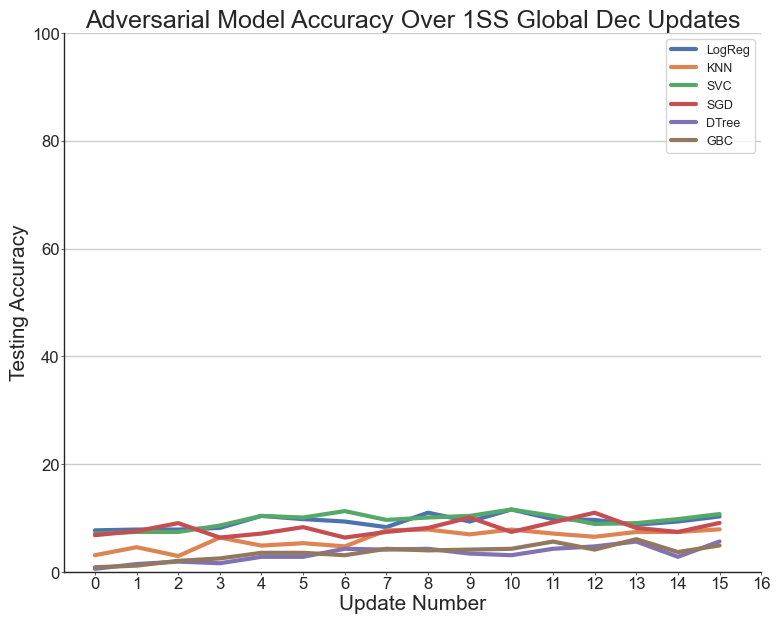

In [30]:
col_num = 1  # Test Acc column
my_global_x_updates = list(range(global_present_updates[0], global_present_updates[-1]+1))

plt.figure(figsize=(9,7))
plt.plot(my_global_x_updates, global_lr_df_1ss.iloc[:, col_num], label='LogReg')
plt.plot(my_global_x_updates, global_knn_df_1ss.iloc[:, col_num], label='KNN')
plt.plot(my_global_x_updates, global_svc_df_1ss.iloc[:, col_num], label='SVC')
plt.plot(my_global_x_updates, global_sgd_df_1ss.iloc[:, col_num], label='SGD')
plt.plot(my_global_x_updates, global_dt_df_1ss.iloc[:, col_num], label='DTree')
plt.plot(my_global_x_updates, global_gbt_df_1ss.iloc[:, col_num], label='GBC')
plt.xticks(np.arange(0, final_update+1, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Adversarial Model Accuracy Over 1SS Global Dec Updates')
plt.legend(loc='best')
plt.show()

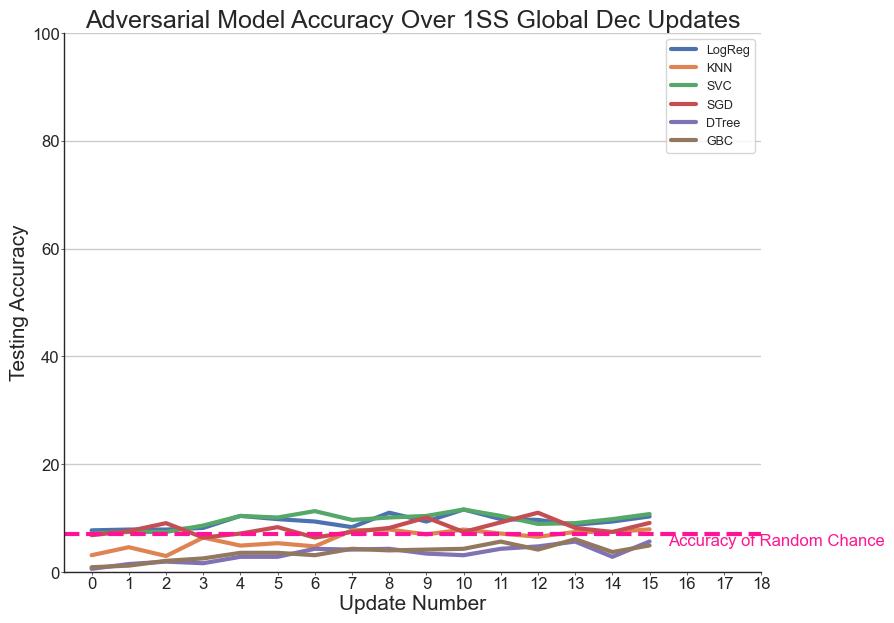

In [31]:
col_num = 1  # Test Acc column

plt.figure(figsize=(9,7))
plt.plot(my_global_x_updates, global_lr_df_1ss.iloc[:, col_num], label='LogReg')
plt.plot(my_global_x_updates, global_knn_df_1ss.iloc[:, col_num], label='KNN')
plt.plot(my_global_x_updates, global_svc_df_1ss.iloc[:, col_num], label='SVC')
plt.plot(my_global_x_updates, global_sgd_df_1ss.iloc[:, col_num], label='SGD')
plt.plot(my_global_x_updates, global_dt_df_1ss.iloc[:, col_num], label='DTree')
plt.plot(my_global_x_updates, global_gbt_df_1ss.iloc[:, col_num], label='GBC')

plt.axhline(7.14, linestyle='dashed', color='deeppink')
plt.text(15.5,5,'Accuracy of Random Chance', color='deeppink')

plt.xticks(np.arange(global_present_updates[0], 19, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Adversarial Model Accuracy Over 1SS Global Dec Updates')
plt.legend(loc='best')
plt.show()

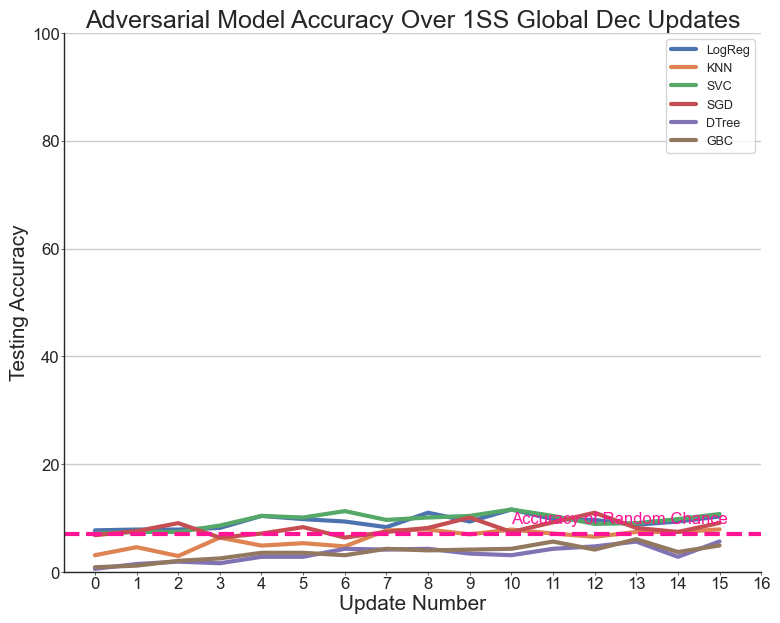

In [32]:
col_num = 1  # Test Acc column

plt.figure(figsize=(9,7))
plt.plot(my_global_x_updates, global_lr_df_1ss.iloc[:, col_num], label='LogReg')
plt.plot(my_global_x_updates, global_knn_df_1ss.iloc[:, col_num], label='KNN')
plt.plot(my_global_x_updates, global_svc_df_1ss.iloc[:, col_num], label='SVC')
plt.plot(my_global_x_updates, global_sgd_df_1ss.iloc[:, col_num], label='SGD')
plt.plot(my_global_x_updates, global_dt_df_1ss.iloc[:, col_num], label='DTree')
plt.plot(my_global_x_updates, global_gbt_df_1ss.iloc[:, col_num], label='GBC')

plt.axhline(7.14, linestyle='dashed', color='deeppink')
plt.text(10,9,'Accuracy of Random Chance', color='deeppink')

plt.xticks(np.arange(global_present_updates[0], final_update+1, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Adversarial Model Accuracy Over 1SS Global Dec Updates')
plt.legend(loc='best')
plt.show()

In [43]:
global1ss_mean_df = pd.DataFrame()
global1ss_mean_df = pd.concat([global1ss_mean_df, global_lr_df_1ss['Test Acc']], axis=1)
global1ss_mean_df = pd.concat([global1ss_mean_df, global_knn_df_1ss['Test Acc']], axis=1)
global1ss_mean_df = pd.concat([global1ss_mean_df, global_svc_df_1ss['Test Acc']], axis=1)
global1ss_mean_df = pd.concat([global1ss_mean_df, global_sgd_df_1ss['Test Acc']], axis=1)
global1ss_mean_df = pd.concat([global1ss_mean_df, global_gbt_df_1ss['Test Acc']], axis=1)
global1ss_mean_df = pd.concat([global1ss_mean_df, global_dt_df_1ss['Test Acc']], axis=1)

global1ss_mean_series = global1ss_mean_df.mean(axis=1)
print(global1ss_mean_series.shape)
print(global1ss_mean_series)

(7,)
0       4.117
0       4.504
0    5.099333
0       5.367
0    5.188667
0      5.7935
0       5.188
dtype: object


## Paper Version

## Presentation Version

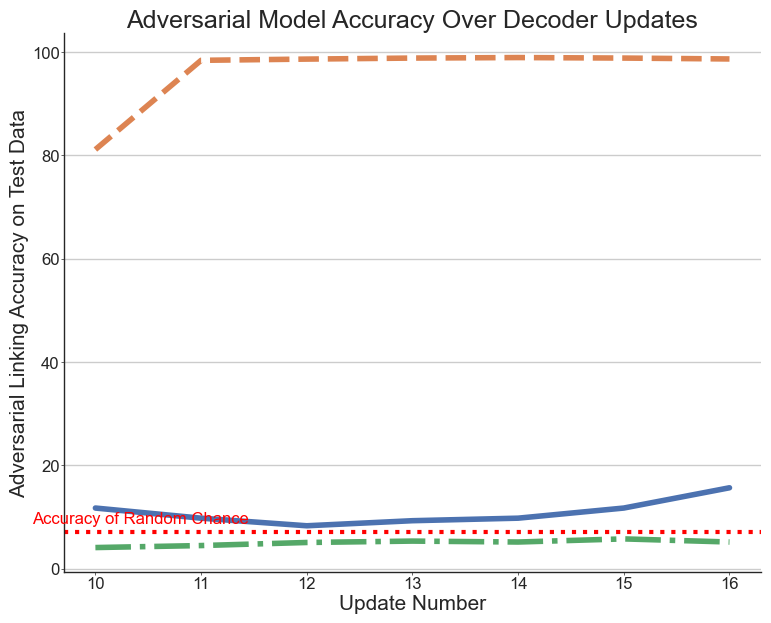

<Figure size 900x700 with 0 Axes>

In [44]:
fl_x_updates = list(range(present_updates[0], present_updates[-1]+1))

fig, ax1 = plt.subplots(figsize=(9,7))

plt.figure(figsize=(9,7))
ax1.plot(fl_x_updates, nofl_mean_series[10:], linewidth=4, label='Mean NoFL Adv Model')
ax1.plot(fl_x_updates, fl1ss_good_mean_series, linewidth=4, linestyle='dashed', label='1SS Local Adv Model')
ax1.plot(fl_x_updates, global1ss_mean_series, linewidth=4, linestyle='dashdot', label='1SS Global Adv Model')

ax1.set_xticks(np.arange(present_updates[0], final_update+1, 1.0))
ax1.set_yticks(np.arange(0, 120, 20.0))
ax1.grid(axis='y')
ax1.set_xlabel('Update Number')
ax1.set_ylabel('Adversarial Linking Accuracy on Test Data')
ax1.set_title('Adversarial Model Accuracy Over Decoder Updates')

#plt.axhline(7.14, linestyle='dashed', color='deeppink')
#plt.text(10,9,'Accuracy of Random Chance', color='deeppink')
ax1.axhline(7.14, linestyle='dotted', color='red')
ax1.text(9.4,8.7,'Accuracy of Random Chance', color='red')

# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
ax1.legend(loc='center left', bbox_to_anchor=(0.35, -0.15))
#ax1.legend(loc='best')

leg = ax1.legend(loc='center left')
leg.remove()

#ax1.spines[['right', 'top']].set_visible(False)
ax1.spines[['top']].set_visible(False)

In [15]:
dec_flattened_sb1 = pd.read_csv("Data\pers_decs_sb1.csv")
dec_flattened_sb1.drop('Unnamed: 0', axis=1, inplace=True)
dec_flattened_sb1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Data\\pers_decs_sb1.csv'

These should not be strings.... rework them smh

In [ ]:
# Make each ele its own cell
expanded_dec_df_sb1 = dec_flattened_sb1.join(dec_flattened_sb1['Flattened Dec'].apply(pd.Series)).drop('Flattened Dec', axis=1)
print(expanded_dec_df_sb1.shape)
expanded_dec_df_sb1.head()

In [ ]:
assert(1==0)

In [ ]:
full_test_df_1ss = make_all_update_models(expanded_dec_df_1ss, n_start_stop=(present_updates[0], present_updates[-1]), stratification=True)
full_test_df_1ss.head()

In [ ]:
global_lr_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='LogisticRegression()']
global_knn_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='KNeighborsClassifier()']
global_svc_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='LinearSVC()']
global_sgd_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='SGDClassifier()']
global_dt_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='DecisionTreeClassifier()']
global_gbt_df_1ss = global_full_test_df_1ss[global_full_test_df_1ss['Algorithm']=='GradientBoostingClassifier()']